In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report




In [2]:
# 1. Load MNIST dataset (70,000 images of 28x28 pixels)
print("Loading dataset...")
mnist = fetch_openml('mnist_784', version=1, as_frame=False)

X, y = mnist["data"], mnist["target"].astype(np.int8)



Loading dataset...


In [3]:
# 2. Split into train & test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)



In [4]:
# 3. Scale features (important for ML models)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train.astype(np.float64))
X_test = scaler.transform(X_test.astype(np.float64))



In [5]:
# 4. Train model (Logistic Regression)
print("Training model...")
clf = LogisticRegression(max_iter=1000, solver="lbfgs", multi_class="multinomial")
clf.fit(X_train, y_train)



Training model...


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


LogisticRegression(max_iter=1000, multi_class='multinomial')

In [6]:
# 5. Predictions
y_pred = clf.predict(X_test)



In [7]:
# 6. Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))



Accuracy: 0.9153571428571429

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.96      0.96      1343
           1       0.94      0.97      0.96      1600
           2       0.90      0.89      0.90      1380
           3       0.90      0.89      0.89      1433
           4       0.92      0.92      0.92      1295
           5       0.88      0.88      0.88      1273
           6       0.93      0.95      0.94      1396
           7       0.92      0.94      0.93      1503
           8       0.90      0.86      0.88      1357
           9       0.89      0.90      0.90      1420

    accuracy                           0.92     14000
   macro avg       0.91      0.91      0.91     14000
weighted avg       0.92      0.92      0.92     14000



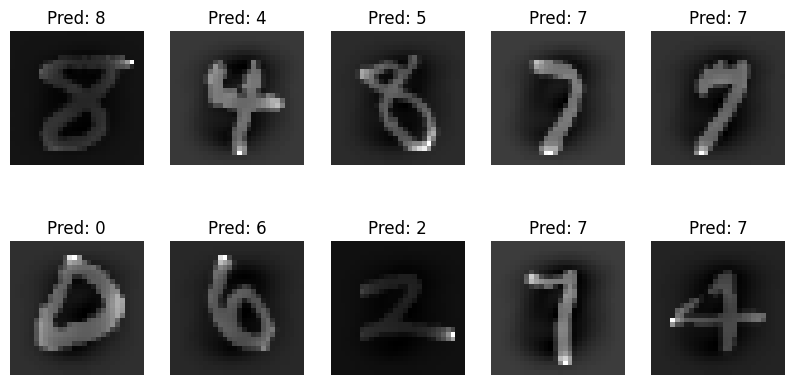

In [8]:
# 7. Show some test predictions
fig, axes = plt.subplots(2, 5, figsize=(10, 5))
for i, ax in enumerate(axes.ravel()):
    ax.imshow(X_test[i].reshape(28, 28), cmap="gray")
    ax.set_title(f"Pred: {y_pred[i]}")
    ax.axis("off")
plt.show()